# Helper functions

In [1]:
# Import
%load_ext autoreload
%autoreload 2

import json
import os
import pandas as pd
import re
import sys
from pathlib import Path

# Add SynFlow to path in order to import modules
repo_root = "../../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)
from SynFlow.SCD import print_jsd_by_period, plot_jsd_by_period, plot_items_jsd_by_period

# Analysis

In [2]:
# RSC
target_lemma = 'air'
target_pos = 'N'
keyword_string = f'{target_lemma}\t{target_pos}' # Or you can use the full POS for precision (e.g., {target_lemma}\tNOUN)
period = '1750-1819'
corpus_path = './RSC/1750-1819_che_half_decades'
fname_pattern = re.compile(
    r'Royal_Society_Corpus_open_v6\.0_text_(?P<id>\d+)_(?P<year>\d+)\.txt$'
)

In [3]:
output_folder = Path(f'./')
input_SCD = output_folder / 'input' / 'SCD' /f'{target_lemma}-{target_pos}-{period}'
os.makedirs(input_SCD, exist_ok=True)

### Air

In [4]:
fname_df_pattern = re.compile(
    rf'air/Royal_Society_Corpus_open_v6\.0_text_'   # fixed prefix
    rf'(?P<id>\d+)_'                            # capture numeric ID
    rf'(?P<year>\d+)'                           # capture year
    rf'.txt/\d+$'             #  and extension and line number
)

all_sfillers_df_path = './output/air-N-1750-1819/Explorer/air_samples_sfillerdf_all.csv'

#### Preprocessing

This step is unique to the type of data we're working with.

##### chi_amod

In [9]:
air_chiamod_df_path = f'{input_SCD}/air_chiamod_1750-1819.csv'
interest_slot = 'chi_amod'
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
air_chiamod_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=air_chiamod_df_path)

In [10]:
# Replace the slot-fillers for specific slot

from SynFlow.Explorer import replace_in_sfiller_df_column

replacements = {
    "dephlogisticate/V": "dephlogisticated/A",
    "phlogisticate/V": "phlogisticated/A",
    'plllogisticate/V': 'phlogisticated/A',
    'deplllogisticate/V': 'dephlogisticated/A',
    'gisticate/V': 'phlogisticated/A',
    'Open/A': 'open/A',
    'atmospheric/A': 'atmospherical/A',
    'fix/V': 'fixed/A',
}
replace_in_sfiller_df_column(air_chiamod_df_path,
                             'chi_amod',
                             replacements=replacements,
                             output_path = air_chiamod_df_path)


In [11]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(air_chiamod_df_path, 'chi_amod', 5)

,id,subfolder,target,chi_amod
0,air/Royal_Society_Corpus_open_v6.0_text_105219...,1750,['air/N'],open/A
1,air/Royal_Society_Corpus_open_v6.0_text_105219...,1750,['air/N'],cold/A
2,air/Royal_Society_Corpus_open_v6.0_text_105145...,1750,['air/N'],open/A
3,air/Royal_Society_Corpus_open_v6.0_text_105179...,1750,['air/N'],open/A
4,air/Royal_Society_Corpus_open_v6.0_text_105179...,1750,['air/N'],open/A
...,...,...,...,...
6767,air/Royal_Society_Corpus_open_v6.0_text_107573...,1815,['air/N'],rarefied/A
6768,air/Royal_Society_Corpus_open_v6.0_text_107574...,1815,['air/N'],foul/A
6769,air/Royal_Society_Corpus_open_v6.0_text_107574...,1815,['air/N'],more/A
6770,air/Royal_Society_Corpus_open_v6.0_text_107574...,1815,['air/N'],little/A


##### pa_obl

In [8]:
air_paobl_df_path = f'{input_SCD}/air_paobl_1750-1819.csv'
interest_slot = 'pa_obl'
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
air_paobl_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=air_paobl_df_path)

In [9]:
# Remove all adjective from the slot-filler column
import pandas as pd
# load dataframe
air_paobl_df = pd.read_csv(air_paobl_df_path)

# keep rows where pa_obl does not end with /A
air_paobl_df = air_paobl_df[~air_paobl_df["pa_obl"].str.endswith("/A']")]

# save if needed
air_paobl_df.to_csv(air_paobl_df_path, index=False)


In [12]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(air_paobl_df_path, 'pa_obl', 5)

NameError: name 'air_paobl_df_path' is not defined

##### pa_nmod

In [29]:
air_panmod_df_path = f'{input_SCD}/air_panmod_1750-1819.csv'
interest_slot = 'pa_nmod'
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
air_panmod_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=air_panmod_df_path)

In [30]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(air_panmod_df_path, 'pa_nmod', 5)

,id,subfolder,target,pa_nmod
0,air/Royal_Society_Corpus_open_v6.0_text_105219...,1750,['air/N'],moisture/N
1,air/Royal_Society_Corpus_open_v6.0_text_105166...,1750,['air/N'],electricity/N
2,air/Royal_Society_Corpus_open_v6.0_text_105167...,1750,['air/N'],quantity/N
3,air/Royal_Society_Corpus_open_v6.0_text_105074...,1750,['air/N'],resistance/N
4,air/Royal_Society_Corpus_open_v6.0_text_105074...,1750,['air/N'],particle/N
...,...,...,...,...
4643,air/Royal_Society_Corpus_open_v6.0_text_107517...,1815,['air/N'],part/N
4644,air/Royal_Society_Corpus_open_v6.0_text_107517...,1815,['air/N'],quantity/N
4645,air/Royal_Society_Corpus_open_v6.0_text_107517...,1815,['air/N'],quantity/N
4646,air/Royal_Society_Corpus_open_v6.0_text_107517...,1815,['air/N'],stream/N


#### Frequency Changes

In [13]:
from SynFlow.SCD.freq import plot_freq_top_union_sfillers_by_period
# slot_type = 'pa_nmod'
# slot_df_path = air_panmod_df_path

slot_type = 'chi_amod'
slot_df_path = air_chiamod_df_path

In [14]:
# Bar chart (absolute freq)
plot_freq_top_union_sfillers_by_period(slot_df_path, 
                              slot_type=slot_type,
                              top_n=10,
                              normalized=True, # Normalised or Raw count
                              time_col='subfolder',
                              )

#### Slot Filler JSD

In [15]:
from SynFlow.SCD.jsd import sfillers_jsd_by_period

In [16]:
sfillers_js_df = pd.read_csv(slot_df_path)
sfillers_js_results = sfillers_jsd_by_period(sfillers_js_df, word_col=slot_type, period_col='subfolder', top_n=6)
print_jsd_by_period(sfillers_js_results)


=== Shift to period 1755 ===
Jensen-Shannon Divergence: 0.5154
Top shifted items:
  de_open/A: 0.1000
  bo_fresh/A: 0.0648
  lo_dry/A: 0.0313
  bo_common/A: 0.0278
  bo_incumbent/A: 0.0278
  lo_pure/A: 0.0208

=== Shift to period 1760 ===
Jensen-Shannon Divergence: 0.4875
Top shifted items:
  lo_fresh/A: 0.0648
  bo_moist/A: 0.0400
  bo_surround/V: 0.0400
  lo_incumbent/A: 0.0278
  lo_common/A: 0.0278
  in_open/A: 0.0234

=== Shift to period 1765 ===
Jensen-Shannon Divergence: 0.7861
Top shifted items:
  bo_fixed/A: 0.1708
  de_open/A: 0.1311
  bo_common/A: 0.0928
  bo_inflammable/A: 0.0645
  de_hot/A: 0.0530
  lo_surround/V: 0.0400

=== Shift to period 1770 ===
Jensen-Shannon Divergence: 0.2285
Top shifted items:
  bo_nitrous/A: 0.0636
  bo_putrid/A: 0.0183
  de_much/A: 0.0178
  in_mephitic/A: 0.0125
  de_cold/A: 0.0099
  bo_noxious/A: 0.0095

=== Shift to period 1775 ===
Jensen-Shannon Divergence: 0.2223
Top shifted items:
  de_fixed/A: 0.0519
  bo_dephlogisticated/A: 0.0356
  lo_me

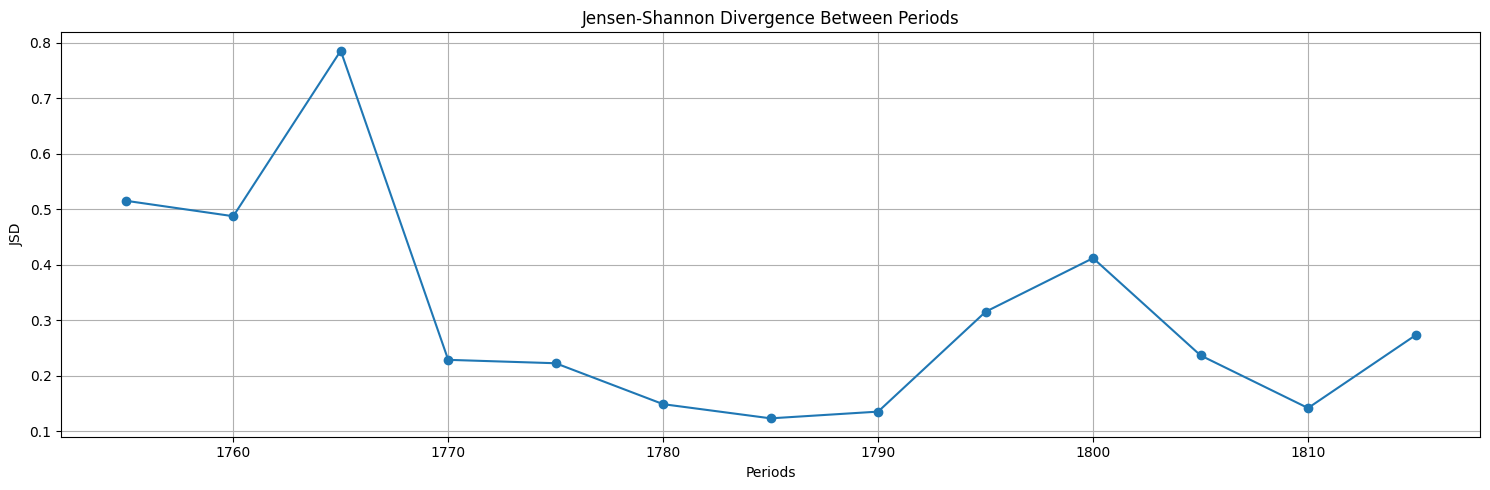

In [17]:
plot_jsd_by_period(sfillers_js_results)

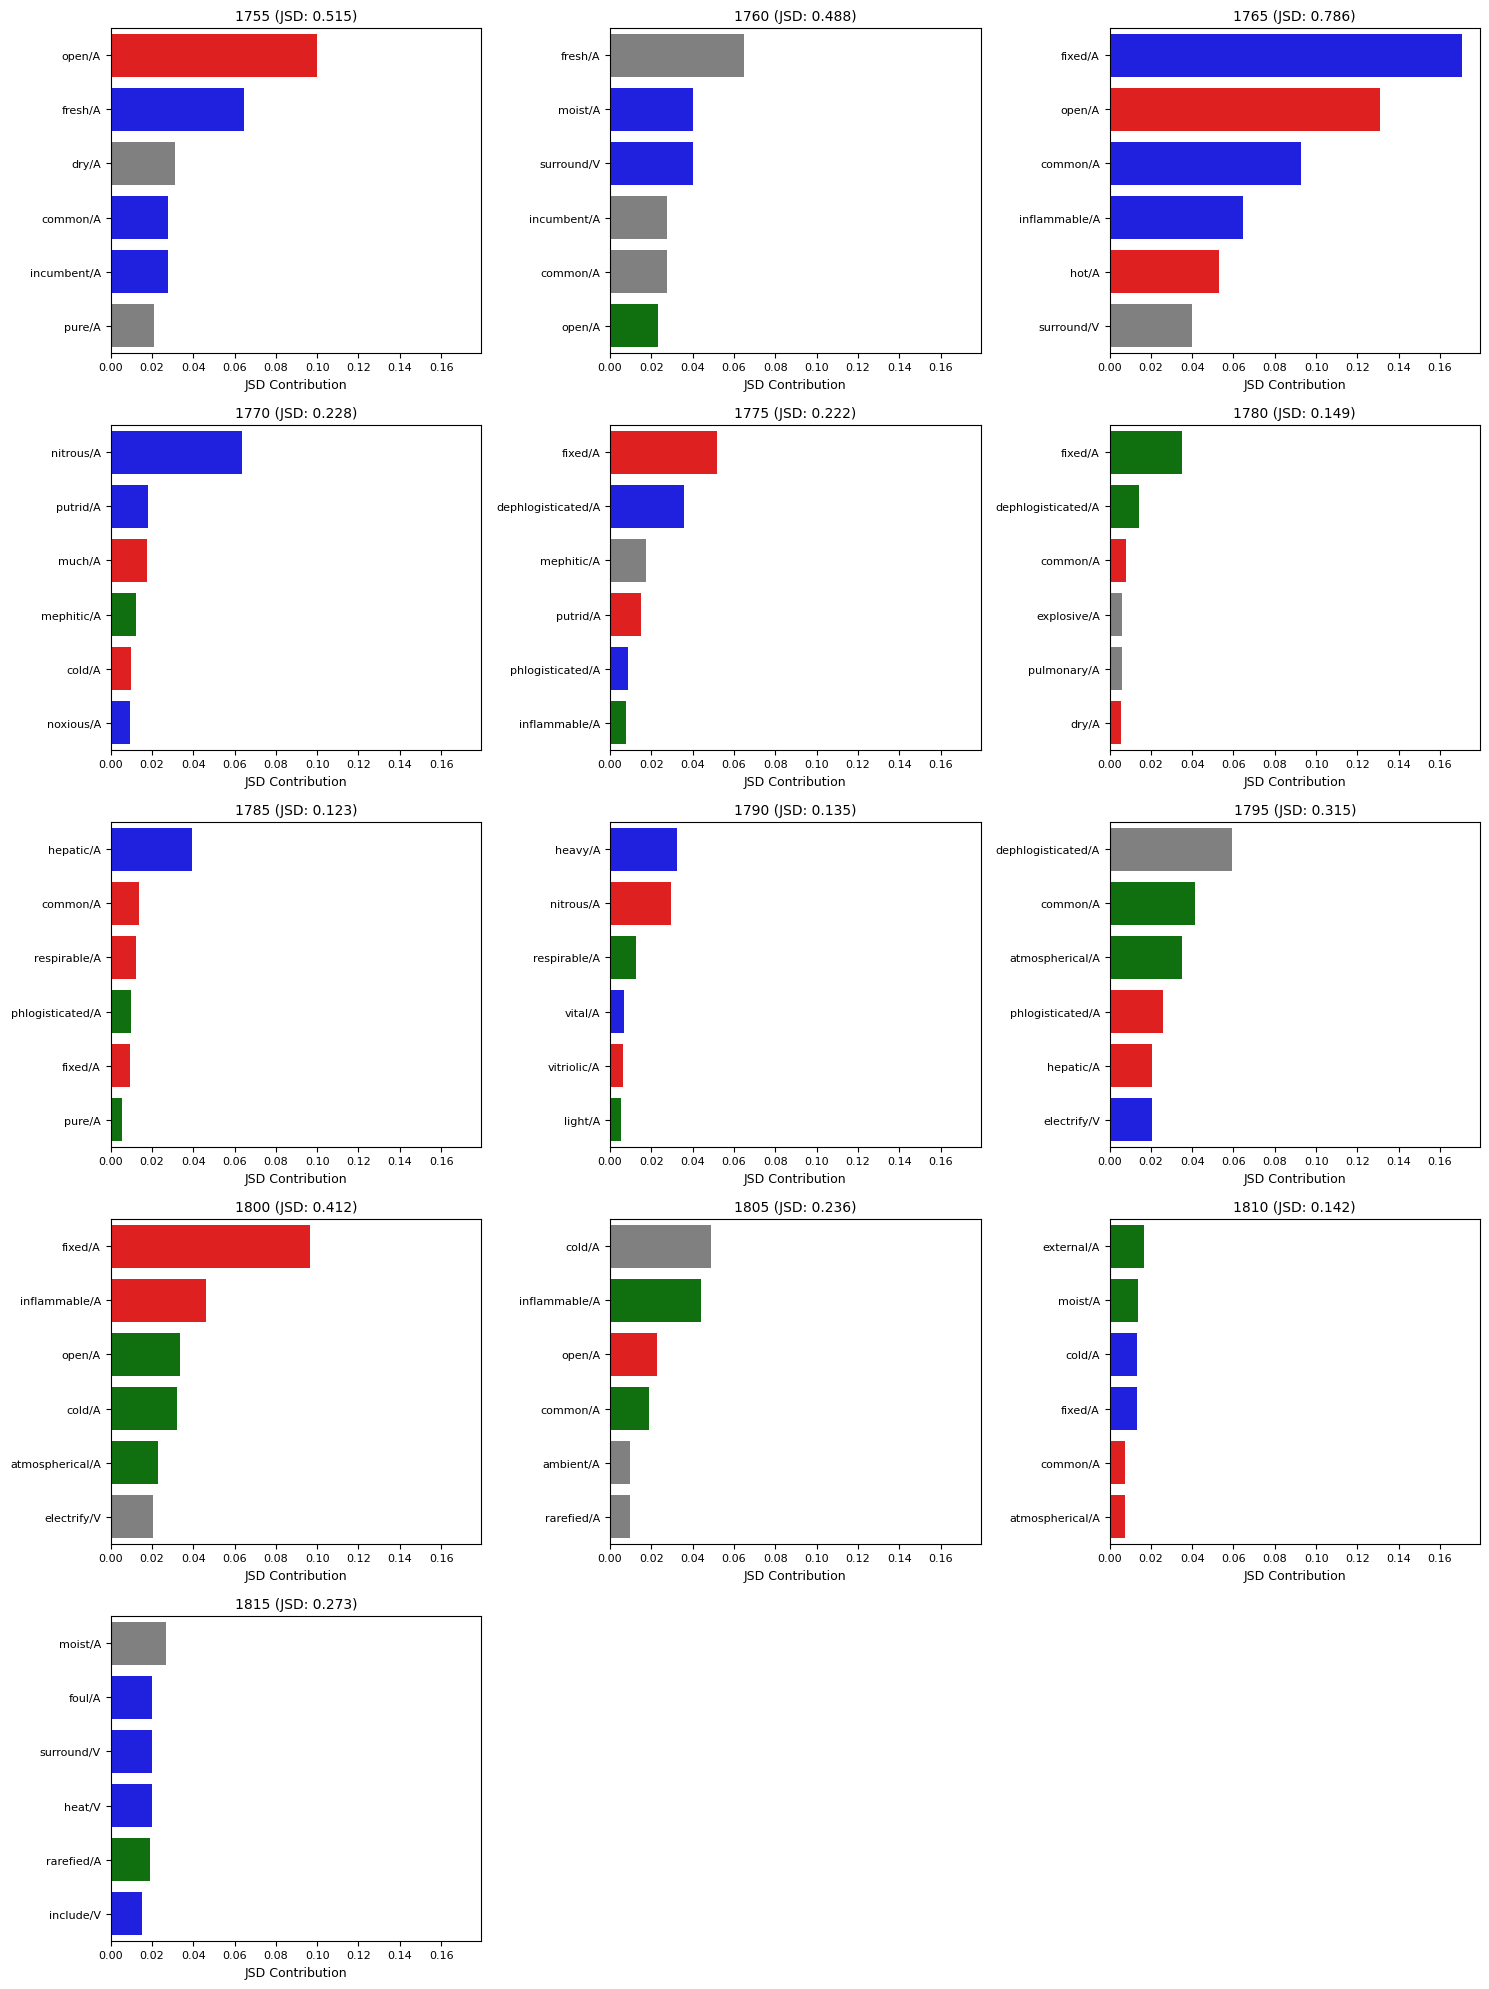

In [18]:
plot_items_jsd_by_period(sfillers_js_results, top_n=6, cols=3)